# **PROJET RAKUTEN**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **DataFrame recomposer à considérer pour le projet**

In [ ]:
df=  pd.read_csv('/content/df_ra.csv', sep = ',')
df

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3.804725e+09,1.263597e+09,10.0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,4.360676e+08,1.008141e+09,2280.0
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,2.011151e+08,9.387780e+08,50.0
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,5.041876e+07,4.570475e+08,1280.0
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2.785359e+08,1.077758e+09,2705.0
...,...,...,...,...,...
32592,Pokémon - 34/114 - Gamblast - Xy - Offensive V...,NaN,1.493308e+09,1.084429e+09,1160.0
32593,BESTWAY Echelle plateforme - 2 x 4 marches - P...,BESTWAY Echelle plateforme - 2 x 4 marches - P...,3.896606e+09,1.260968e+09,2583.0
32594,Canapé 2 Places Gris En Polyester Imitation Cu...,<b>Canapé 2 places gris au style rétro en poly...,3.399270e+09,1.211890e+09,1560.0
32595,Casque Gaming Stéréo Avec Micro Pour Pc Ct649,Casque gaming stereo avec micro pour PC - Avec...,4.039210e+09,1.279939e+09,50.0


## **Les information du DataFrame df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   designation  32597 non-null  object 
 1   description  21262 non-null  object 
 2   productid    32596 non-null  float64
 3   imageid      32596 non-null  float64
 4   prdtypecode  32596 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.2+ MB


## **Suppression des colonnes ci dessous**

In [ ]:
df = df.drop(['description'], axis=1)
df = df.drop(['designation'], axis=1)

## **Corrélation du DataFrame**

In [ ]:
df.info()
cor = df.corr()
print("taille de cor",len(cor))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productid    32596 non-null  float64
 1   imageid      32596 non-null  float64
 2   prdtypecode  32596 non-null  float64
dtypes: float64(3)
memory usage: 764.1 KB
taille de cor 3


## **Heatmap relatif à la corrélation entre toutes les variables quantitatives**

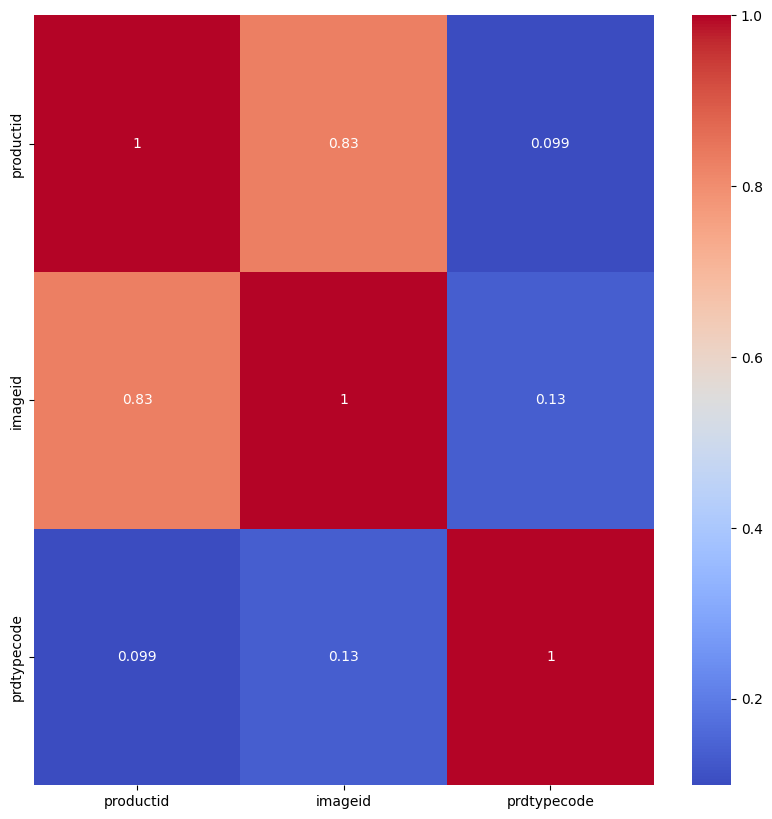

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(
cor,
ax = ax,
cmap = "coolwarm",
annot=True);

plt.show();

## **Histogramme avec estimation de la densité par prdtypecode**

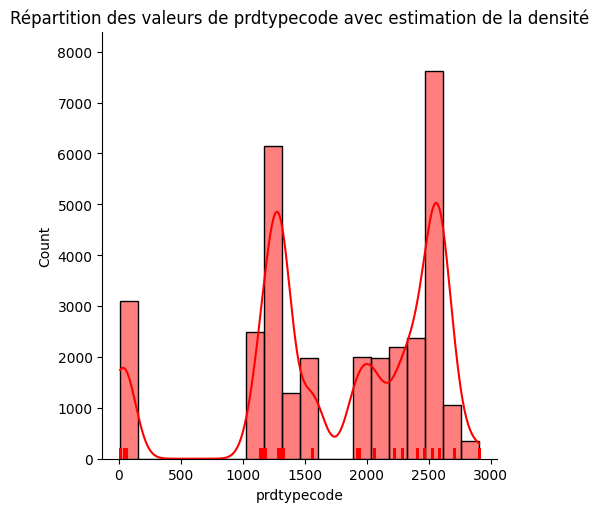

In [ ]:
sns.displot(df.prdtypecode, bins=20, kde = True, rug=True, color="red")
plt.title('Répartition des valeurs de prdtypecode avec estimation de la densité')
plt.show()

## **Analyse de la répartition des valeurs de prdtypecode**

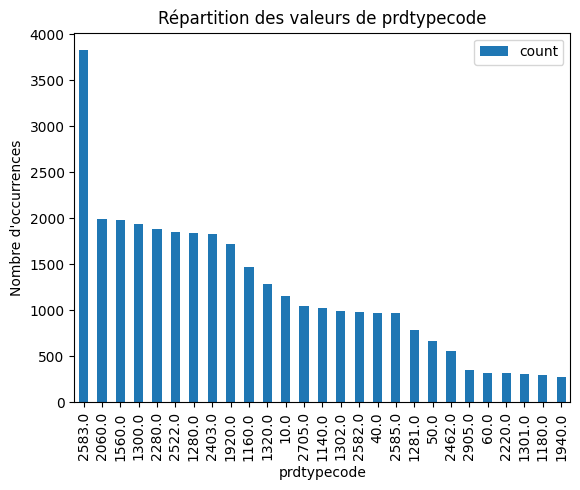

In [ ]:
distribution = df['prdtypecode'].value_counts()
distribution_df = distribution.reset_index()
distribution_df.columns = ['prdtypecode', 'count']
distribution_df.plot(kind='bar', x='prdtypecode', y='count')
plt.xlabel('prdtypecode')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des valeurs de prdtypecode')
plt.show()

## **Nuage de point entre productid et prdtypecode**

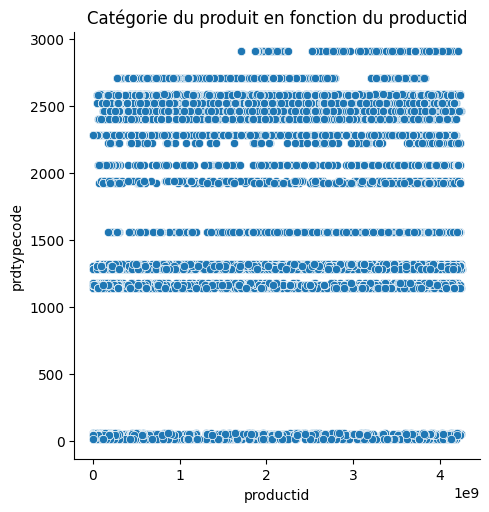

In [ ]:
sns.relplot(x=df.productid, y=df.prdtypecode)
plt.title('Catégorie du produit en fonction du productid')
plt.show()

## **Corrélation entre productid et prdtypecode**

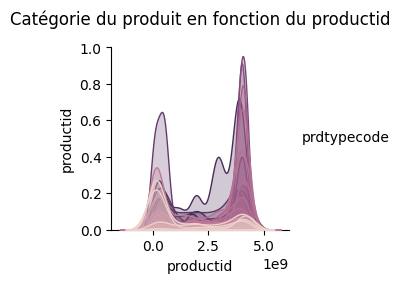

In [ ]:
sns.pairplot(df[['productid', 'prdtypecode']], hue="prdtypecode",diag_kind="kde")
plt.title('Catégorie du produit en fonction du productid')
plt.show()

## **Fusion des deux colonnes**

In [ ]:
df=  pd.read_csv('/content/df_ra.csv', sep = ',')
df['descriptif'] = df['description'].map(str).replace("nan", " ")  + " " + df['designation'].map(str)
df

,designation,description,productid,imageid,prdtypecode,descriptif
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3.804725e+09,1.263597e+09,10.0,Olivia: Personalisiertes Notizbuch / 150 Sei...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,4.360676e+08,1.008141e+09,2280.0,Journal Des Arts (Le) N° 133 Du 28/09/2001 -...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,2.011151e+08,9.387780e+08,50.0,PILOT STYLE Touch Pen de marque Speedlink est ...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,5.041876e+07,4.570475e+08,1280.0,Peluche Donald - Europe - Disneyland 2000 (M...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2.785359e+08,1.077758e+09,2705.0,Luc a des id&eacute;es de grandeur. Il veut or...
...,...,...,...,...,...,...
32592,Pokémon - 34/114 - Gamblast - Xy - Offensive V...,NaN,1.493308e+09,1.084429e+09,1160.0,Pokémon - 34/114 - Gamblast - Xy - Offensive...
32593,BESTWAY Echelle plateforme - 2 x 4 marches - P...,BESTWAY Echelle plateforme - 2 x 4 marches - P...,3.896606e+09,1.260968e+09,2583.0,BESTWAY Echelle plateforme - 2 x 4 marches - P...
32594,Canapé 2 Places Gris En Polyester Imitation Cu...,<b>Canapé 2 places gris au style rétro en poly...,3.399270e+09,1.211890e+09,1560.0,<b>Canapé 2 places gris au style rétro en poly...
32595,Casque Gaming Stéréo Avec Micro Pour Pc Ct649,Casque gaming stereo avec micro pour PC - Avec...,4.039210e+09,1.279939e+09,50.0,Casque gaming stereo avec micro pour PC - Avec...


In [ ]:
df.isnull().sum()

In [ ]:
def traitement_lang(X):
   df_lang=pd.DataFrame(X['descriptif'].apply(detect_lang))
   print(df_lang.value_counts())
   print("nombre d'éléments=", len(df_lang))
   return df_lang

In [ ]:
liste = df['descriptif']
len(liste)

32597

## **Détection des valeurs abbérantes "Outliers" visuellement**

In [ ]:
sns.boxplot(x=df['descriptif'])
plt.show()

<Axes: xlabel='descriptif'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 133 (\x85) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 148 (\x94) missing from cu

## **Détection des valeurs abbérantes "Outliers" analytiquement**

In [ ]:
#Il s'agit de définir une limite pour les valeurs abberantes
upper_lim=df=['descriptif'].quantile(.95)
outliers=df[df['descriptif']>upper_lim]
outliers

### **Nous souhaitons utiliser z_score**

In [ ]:
outliers=[]
def detect_outliers(df):
  threshold=3
  mean=np.mean(df)
  std=np.std(df)

  for i in df:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers

In [ ]:
#détecter les mots considérés comme outliers
detect_ouliers(df['descriptif'])

In [ ]:
def recuperer_langues(liste):
  langues = []

for element in liste:
  if isinstance (element, str):
    langues.append(element)

In [ ]:
print(langues)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
langues

['  Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design',
 "  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.",
 'PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<br> Pour un confort optimal et une précision maximale sur le GamePad de la Wii U: ce grand stylet hautement ergonomique est non seulement parfaitement adapté à votre main mais aussi très élégant.<br> Il est livré avec un support qui se fixe sans adhésif à l\'arrière du GamePad<br> <br> Caractéristiques:<br> Modèle: Speedlink PILOT STYLE Touch Pen<br> Couleur: Bleu<br> Ref. Fabricant: SL-3468-BE<br> Compatibilité: GamePad Nintendo Wii U<br> Forme particulièrement ergonomique excellente tenue en main<br> Pointe à revêtement longue durée conçue pour ne pas abîmer l\'écran tactile<br> En bon

In [ ]:
def traitement_lang(X):
   df_lang=pd.DataFrame(X['descriptif'].apply(detect_lang))
   print(df_lang.value_counts())
   print("nombre d'éléments=", len(df_lang))
   return df_lang

In [ ]:
len(langues)

65194

In [ ]:
def word_occurence_by_prdtypecode(X, y):
   df = pd.DataFrame()
   df['prdtypecode']= y['prdtypecode']
   df['descriptif'] = X['descriptif']
   df['mots'] = df['descriptif'].apply(nettoyer_et_separer)
   compteurs_par_classe = {}
   for classe, groupe in df.groupby('prdtypecode'):
       tous_les_mots = [
mot for liste_mots in groupe['mots'] for mot in liste_mots
 ]
       compteurs_par_classe[classe] = Counter(tous_les_mots)


   df_result = pd.DataFrame(compteurs_par_classe).fillna(0).astype(int)
   return df_result